#UTS Olah Data PTA

In [69]:
pip install --upgrade scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import numpy as np
import pandas as pd

## Ambil Data

In [78]:
df = pd.read_excel('TabelPtaFix.xlsx')
df.head(10)

,NIM,Nama,Judul,Abstrak,Kelas
0,70411100070,Heri Supriyanto,SISTEM PENDUKUNG KEPUTUSAN OPTIMASI PENJADWALA...,Penjadwalan kuliah di Perguruan Tinggi me...,Komputasi
1,80411100115,Septian Rahman Hakim,SISTEM AUGMENTED REALITY ANIMASI BENDA BERGERA...,Seiring perkembangan teknologi yang ada diduni...,Komputasi
2,70411100126,NURRACHMAT,RANCANG BANGUN GAME PERAWATAN SAPI KARAPAN MEN...,"Perkembangan game yang semakin pesat, memberik...",Komputasi
3,70411100109,Muhammad Choirur Rozi,EKSTRAKSI FITUR BERBASIS TWO DIMENSIONAL LINEA...,Sistem pengenalan wajah adalah suatu sistem un...,Komputasi
4,70411100143,"Robiatul Adawiyah, S.Kom",APLIKASI METODE FUZZY ANALYTIC NETWORK PROCESS...,Perusahaan pemerintah maupun swasta mempunyai ...,Komputasi
5,70411100037,Desy Mariana S. Kom,SISTEM PENDUKUNG KEPUTUSAN REKOMENDASI MENU DI...,Pelayanan makanan bagi pasien rawat inap di Ru...,Komputasi
6,70411100050,Erwina Safitri,DETEKSI COREPOINT SIDIK JARI MENGGUNAKAN METOD...,Sidik jari adalah salah satu karakteristik fis...,Komputasi
7,70411100124,Nur Anggraeni,SISTEM PENENTUAN STATUS GIZI PASIEN RAWAT INAP...,Di Indonesia masalah perkembangan gizi adalah ...,Komputasi
8,70411100072,Hilyati Safitri,PENGENALAN TULISAN TANGAN HURUF ALFABETDENGAN ...,Pengenalan tulisan tangan merupakan topik pene...,Komputasi
9,70411100152,SITI KHOLILAH,PENGENALAN POLA SENYUMAN BERBASIS EKSTRAKSI FI...,Citra senyum merupakan salah satu fitur biomet...,Komputasi


## Mencari Data Null




In [6]:
df.isnull().sum()

NIM         0
Nama       10
Judul       6
Abstrak    29
Kelas      37
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
df.isnull().sum()

NIM        0
Nama       0
Judul      0
Abstrak    0
Kelas      0
dtype: int64

## Data Tidak Null

In [9]:
df.count()

NIM        798
Nama       798
Judul      798
Abstrak    798
Kelas      798
dtype: int64

### Mengecek total Class 

In [10]:
# Jumlah data pada masing-masing label KBK
df['Kelas'].value_counts()

Komputasi    418
RPL          254
NLP          126
Name: Kelas, dtype: int64

### Grafik Class

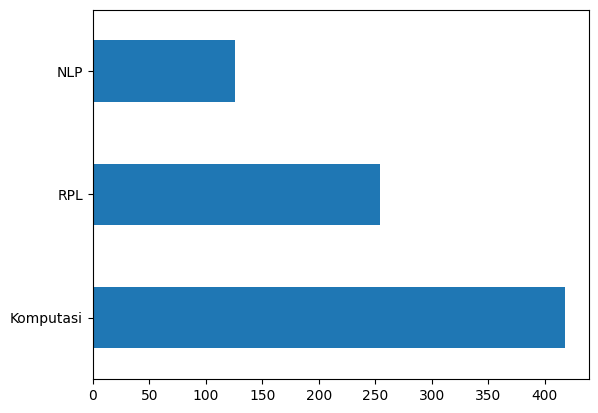

In [11]:
import matplotlib.pyplot as plt

df['Kelas'].value_counts().plot(kind='barh')
plt.show()

### Cleaning Data

In [12]:
import re, string

# Data Clean
def clean(data):
    # HTML Tag Removal
    data = re.compile('<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});').sub('', str(data))

    # Case folding
    data = data.lower()

    # Trim data
    data = data.strip()

    # Remove punctuations, karakter spesial, and spasi ganda
    data = re.compile('<.*?>').sub('', data)
    data = re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', data)
    data = re.sub('\s+', ' ', data)

    # Number removal
    data = re.sub(r'\[[0-9]*\]', ' ', data)
    data = re.sub(r'[^\w\s]', '', str(data).lower().strip())
    data = re.sub(r'\d', ' ', data)
    data = re.sub(r'\s+', ' ', data)

    # Mengubah data 'nan' dengan whitespace agar nantinya dapat dihapus
    data = re.sub('nan', '', data)

    return data



In [13]:
df['Judul'] = df['Judul'].apply(lambda x: clean(x))
df['Abstrak'] = df['Abstrak'].apply(lambda x: clean(x))

df.head()

,NIM,Nama,Judul,Abstrak,Kelas
0,70411100070,Heri Supriyanto,sistem pendukung keputusan optimasi penjadwala...,penjadwalan kuliah di perguruan tinggi merupak...,Komputasi
1,80411100115,Septian Rahman Hakim,sistem augmented reality animasi benda bergera...,seiring perkembangan teknologi yang ada diduni...,Komputasi
2,70411100126,NURRACHMAT,rancang bangun game perawatan sapi karapan men...,perkembangan game yang semakin pesat memberika...,Komputasi
3,70411100109,Muhammad Choirur Rozi,ekstraksi fitur berbasis two dimensional linea...,sistem pengenalan wajah adalah suatu sistem un...,Komputasi
4,70411100143,"Robiatul Adawiyah, S.Kom",aplikasi metode fuzzy analytic network process...,perusahaan pemerintah maupun swasta mempunyai ...,Komputasi


### Export Data yang sudah dibersihkan

In [14]:
# Checkpoint: Export Hasil Text Cleaning
df.to_csv('hasilcleaning.csv')

### Menghapus Missing Value

In [15]:
# Ubah empty string menjadi NaN value
df = df.replace('', np.nan)

In [16]:
# Cek missing values
df.isnull().sum()

NIM        0
Nama       0
Judul      0
Abstrak    5
Kelas      0
dtype: int64

In [17]:
# Remove missing values
df.dropna(inplace=True)
len(df)

793

### Menghapus Duplicate Value

In [18]:
# Cek apakah terdapat duplikasi data pada kolom judul
df[df['Judul'].duplicated()]

,NIM,Nama,Judul,Abstrak,Kelas
355,120411100015,Abdul Ainur Rofik,sistem pendukung keputusan pemilihan pemain bo...,peningkatan pembinaan permai bola voli terutam...,Komputasi


#### Cek Data Kolom Judul

In [19]:
# Remove duplicates judul
df.drop_duplicates(subset=['Judul'], inplace=True)

# Cek apakah masih terdapat duplikasi data pada kolom judul
df[df['Judul'].duplicated()]

,NIM,Nama,Judul,Abstrak,Kelas


### Cek Data Duplikasi Abstrak

In [20]:
# Remove duplicates abstrak
df.drop_duplicates(subset=['Abstrak'], inplace=True)

# Cek apakah masih terdapat duplikasi data pada kolom abstrak
df[df['Abstrak'].duplicated()]

,NIM,Nama,Judul,Abstrak,Kelas


In [21]:
# Checkpoint: Export Hasil Preprocessing
df.to_csv('hasilduplikasi.csv')

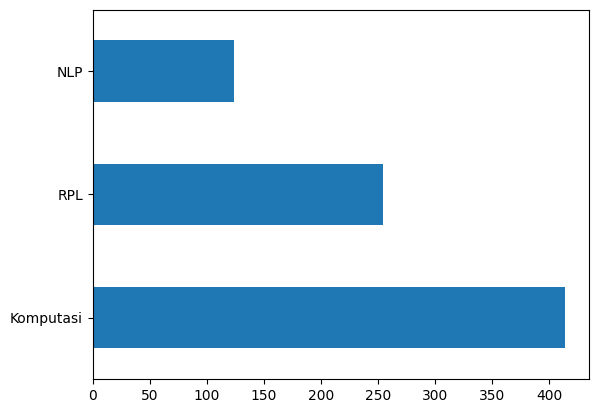

In [22]:
# Distribusi Kelas setelah Text Preprocessing
df['Kelas'].value_counts().plot(kind='barh')
plt.show()

## Tokenisasi
Memisahkan setiap kata

In [23]:
import nltk
from nltk.tokenize import word_tokenize
# nltk.download('punkt')
nltk.download('popular')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

True

### Tokenisasi Judul

In [24]:
# Tokenizing Judul
df['judul_tokens'] = df['Judul'].apply(lambda x: word_tokenize(x))
df[["Judul", "judul_tokens"]].head()

,Judul,judul_tokens
0,sistem pendukung keputusan optimasi penjadwala...,"[sistem, pendukung, keputusan, optimasi, penja..."
1,sistem augmented reality animasi benda bergera...,"[sistem, augmented, reality, animasi, benda, b..."
2,rancang bangun game perawatan sapi karapan men...,"[rancang, bangun, game, perawatan, sapi, karap..."
3,ekstraksi fitur berbasis two dimensional linea...,"[ekstraksi, fitur, berbasis, two, dimensional,..."
4,aplikasi metode fuzzy analytic network process...,"[aplikasi, metode, fuzzy, analytic, network, p..."


### Tokenisasi Judul

In [25]:
# Tokenizing Judul
df['judul_tokens'] = df['Judul'].apply(lambda x: word_tokenize(x))
df[["Judul", "judul_tokens"]].head()

,Judul,judul_tokens
0,sistem pendukung keputusan optimasi penjadwala...,"[sistem, pendukung, keputusan, optimasi, penja..."
1,sistem augmented reality animasi benda bergera...,"[sistem, augmented, reality, animasi, benda, b..."
2,rancang bangun game perawatan sapi karapan men...,"[rancang, bangun, game, perawatan, sapi, karap..."
3,ekstraksi fitur berbasis two dimensional linea...,"[ekstraksi, fitur, berbasis, two, dimensional,..."
4,aplikasi metode fuzzy analytic network process...,"[aplikasi, metode, fuzzy, analytic, network, p..."


### Tokenisasi Abstrak

In [26]:
# Tokenizing Abstrak
df['abstrak_tokens'] = df['Abstrak'].apply(lambda x: word_tokenize(x))
df[["Abstrak", "abstrak_tokens"]].head()

,Abstrak,abstrak_tokens
0,penjadwalan kuliah di perguruan tinggi merupak...,"[penjadwalan, kuliah, di, perguruan, tinggi, m..."
1,seiring perkembangan teknologi yang ada diduni...,"[seiring, perkembangan, teknologi, yang, ada, ..."
2,perkembangan game yang semakin pesat memberika...,"[perkembangan, game, yang, semakin, pesat, mem..."
3,sistem pengenalan wajah adalah suatu sistem un...,"[sistem, pengenalan, wajah, adalah, suatu, sis..."
4,perusahaan pemerintah maupun swasta mempunyai ...,"[perusahaan, pemerintah, maupun, swasta, mempu..."


### Menghapus Kata Tidak Penting

In [27]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [28]:
from nltk.corpus import stopwords 
from itertools import chain

stop_words = set(chain(stopwords.words('indonesian'), stopwords.words('english')))

df['judul_tokens'] = df['judul_tokens'].apply(lambda x: [w for w in x if not w in stop_words])
df['abstrak_tokens'] = df['abstrak_tokens'].apply(lambda x: [w for w in x if not w in stop_words])

### Stop Word Judul

In [29]:
df[["Abstrak", "abstrak_tokens"]].head()

,Abstrak,abstrak_tokens
0,penjadwalan kuliah di perguruan tinggi merupak...,"[penjadwalan, kuliah, perguruan, kompleks, per..."
1,seiring perkembangan teknologi yang ada diduni...,"[seiring, perkembangan, teknologi, didunia, mu..."
2,perkembangan game yang semakin pesat memberika...,"[perkembangan, game, pesat, alternative, pemin..."
3,sistem pengenalan wajah adalah suatu sistem un...,"[sistem, pengenalan, wajah, sistem, mengenali,..."
4,perusahaan pemerintah maupun swasta mempunyai ...,"[perusahaan, pemerintah, swasta, tujuan, dicap..."


## Stemming

In [30]:
!pip install sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 KB 7.5 MB/s eta 0:00:00


In [31]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from tqdm.auto import tqdm
tqdm.pandas()

factory = StemmerFactory()
stemmer = factory.create_stemmer()

#### Stemming Judul

In [32]:
# Stemming judul
df['judul_tokens'] = df['judul_tokens'].progress_apply(lambda x: stemmer.stem(' '.join(x)).split(' '))

  0%|          | 0/792 [00:00<?, ?it/s]

In [33]:
# Hasil stemming judul
df[["Judul", "judul_tokens"]].head()

,Judul,judul_tokens
0,sistem pendukung keputusan optimasi penjadwala...,"[sistem, dukung, putus, optimasi, jadwal, mata..."
1,sistem augmented reality animasi benda bergera...,"[sistem, augmented, reality, animasi, benda, g..."
2,rancang bangun game perawatan sapi karapan men...,"[rancang, bangun, game, awat, sapi, karapan, m..."
3,ekstraksi fitur berbasis two dimensional linea...,"[ekstraksi, fitur, bas, two, dimensional, line..."
4,aplikasi metode fuzzy analytic network process...,"[aplikasi, metode, fuzzy, analytic, network, p..."


#### Stemming Abstrak

In [34]:
# Stemming abstrak
df['abstrak_tokens'] = df['abstrak_tokens'].progress_apply(lambda x: stemmer.stem(' '.join(x)).split(' '))

  0%|          | 0/792 [00:00<?, ?it/s]

In [35]:
# Hasil stemming abstrak
df[["Abstrak", "abstrak_tokens"]].head()

,Abstrak,abstrak_tokens
0,penjadwalan kuliah di perguruan tinggi merupak...,"[jadwal, kuliah, guru, kompleks, masalah, vari..."
1,seiring perkembangan teknologi yang ada diduni...,"[iring, kembang, teknologi, dunia, muncul, tek..."
2,perkembangan game yang semakin pesat memberika...,"[kembang, game, pesat, alternative, minat, ben..."
3,sistem pengenalan wajah adalah suatu sistem un...,"[sistem, kenal, wajah, sistem, nali, identitas..."
4,perusahaan pemerintah maupun swasta mempunyai ...,"[usaha, perintah, swasta, tuju, capai, capai, ..."


In [36]:
df['judul_tokens'] = df['judul_tokens'].apply(lambda x: ' '.join(x))
df['abstrak_tokens'] = df['abstrak_tokens'].apply(lambda x: ' '.join(x))

df.to_csv('DataOlah_Pta.csv')

In [37]:
dataOlah = pd.read_csv('DataOlah_Pta.csv', index_col=0)
dataOlah.head()

,NIM,Nama,Judul,Abstrak,Kelas,judul_tokens,abstrak_tokens
0,70411100070,Heri Supriyanto,sistem pendukung keputusan optimasi penjadwala...,penjadwalan kuliah di perguruan tinggi merupak...,Komputasi,sistem dukung putus optimasi jadwal matakuliah...,jadwal kuliah guru kompleks masalah variabel t...
1,80411100115,Septian Rahman Hakim,sistem augmented reality animasi benda bergera...,seiring perkembangan teknologi yang ada diduni...,Komputasi,sistem augmented reality animasi benda gerak f...,iring kembang teknologi dunia muncul teknologi...
2,70411100126,NURRACHMAT,rancang bangun game perawatan sapi karapan men...,perkembangan game yang semakin pesat memberika...,Komputasi,rancang bangun game awat sapi karapan metode f...,kembang game pesat alternative minat bentuk ga...
3,70411100109,Muhammad Choirur Rozi,ekstraksi fitur berbasis two dimensional linea...,sistem pengenalan wajah adalah suatu sistem un...,Komputasi,ekstraksi fitur bas two dimensional linear dis...,sistem kenal wajah sistem nali identitas wajah...
4,70411100143,"Robiatul Adawiyah, S.Kom",aplikasi metode fuzzy analytic network process...,perusahaan pemerintah maupun swasta mempunyai ...,Komputasi,aplikasi metode fuzzy analytic network process...,usaha perintah swasta tuju capai capai tuju us...


# Modeling Data

In [38]:
from sklearn.model_selection import train_test_split

X = dataOlah['abstrak_tokens']
y = dataOlah['Kelas']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Ekstraksi Fitur
term frequency–inverse document frequency

In [92]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

X_tfidf = vectorizer.fit_transform(X)

terms = vectorizer.get_feature_names_out()
df_tfidfvect = pd.DataFrame(data = X_tfidf.toarray(),columns = terms)
df_tfidfvect

,aalysis,aam,abad,abadi,abai,abdi,ability,abjad,absah,absensi,...,zara,zat,zcz,zf,zona,zone,zoning,zoom,zucara,zungu
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
787,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
788,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
789,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
790,0.0,0.0,0.0,0.0,0.0,0.139159,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [94]:
X_tfidf.shape

(792, 5965)

In [95]:
sums = X_tfidf.sum(axis=0)

data = []
for col, term in enumerate (terms):
    data.append((term, sums[0,col]))
    
ranking = pd.DataFrame(data, columns=['term', 'rank'])
print(ranking.sort_values('rank', ascending=False))

                term       rank
4994          sistem  31.673256
1063            data  28.687578
3310          metode  28.507928
875            citra  28.484632
1914           hasil  26.823249
...              ...        ...
4901         setabil   0.050156
2511  keseimbanganya   0.050156
3143            mbps   0.045885
2034            idle   0.045885
4341             qos   0.045885

[5965 rows x 2 columns]


## Oversampling
SMOTE

In [41]:
y_train.value_counts()

Komputasi    288
RPL          181
NLP           85
Name: Kelas, dtype: int64

In [42]:
from imblearn.over_sampling import SMOTE

X_train_resampled, y_train_resampled = SMOTE(random_state=42).fit_resample(X_train_tfidf, y_train)

y_train_resampled.value_counts()

NLP          288
Komputasi    288
RPL          288
Name: Kelas, dtype: int64

### PCA

In [96]:
X_tfidf.shape

(792, 5965)

In [97]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)

X_pca = pca.fit_transform(X_tfidf.toarray())

In [98]:
X_pca.shape

(792, 10)

## Training Data

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

### Naive Bayes

In [88]:
from sklearn.naive_bayes import GaussianNB

In [100]:
bayes = GaussianNB()
model_bayes = bayes.fit(X_train,y_train)
predictions_bayes = model_bayes.predict(X_test)

### KNN

In [101]:
from sklearn.neighbors import KNeighborsClassifier

In [102]:
knn = KNeighborsClassifier(n_neighbors=3)
model_knn = knn.fit(X_train,y_train)
predictions_knn = model_knn.predict(X_test)

### Evaluasi

In [50]:
predictions = model.predict(X_test_tfidf)

In [51]:
# Report the confusion matrix
from sklearn import metrics
print(metrics.confusion_matrix(y_test,predictions))

[[85 17 24]
 [18 11 10]
 [22  7 44]]


In [52]:
!pip install -U scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [54]:
# Print a classification report
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

   Komputasi       0.68      0.67      0.68       126
         NLP       0.31      0.28      0.30        39
         RPL       0.56      0.60      0.58        73

    accuracy                           0.59       238
   macro avg       0.52      0.52      0.52       238
weighted avg       0.58      0.59      0.59       238



In [72]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Print the overall metrics
print('Accuracy score : ', accuracy_score(y_test, predictions)) #kedekatan hasil pengukuran dengan nilai sesungguhnya
print('Precision score : ', precision_score(y_test, predictions, average='weighted')) #seberapa dekat perbedaan nilai saat pengulangan
print('Recall score : ', recall_score(y_test, predictions, average='weighted')) #tingkat keberhhasilan
print('F1 score : ', f1_score(y_test, predictions, average='weighted')) #berbandinga presisi dan recall

Accuracy score :  0.5882352941176471
Precision score :  0.5845236556160927
Recall score :  0.5882352941176471
F1 score :  0.5860348166829293


### Naive BAyes

In [103]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test,predictions_bayes))

[[70 12 44]
 [15 17  7]
 [ 4  3 66]]


In [104]:
print(metrics.classification_report(y_test,predictions_bayes))

              precision    recall  f1-score   support

   Komputasi       0.79      0.56      0.65       126
         NLP       0.53      0.44      0.48        39
         RPL       0.56      0.90      0.69        73

    accuracy                           0.64       238
   macro avg       0.63      0.63      0.61       238
weighted avg       0.68      0.64      0.64       238



In [105]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('Accuracy score : ', accuracy_score(y_test, predictions_bayes))
print('Precision score : ', precision_score(y_test, predictions_bayes, average='weighted'))
print('Recall score : ', recall_score(y_test, predictions_bayes, average='weighted'))
print('F1 score : ', f1_score(y_test, predictions_bayes, average='weighted'))

Accuracy score :  0.6428571428571429
Precision score :  0.6764679024159361
Recall score :  0.6428571428571429
F1 score :  0.6362956194941991


### K Nearest Neighbor

In [106]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test,predictions_knn))

[[103   5  18]
 [ 21  12   6]
 [ 19   2  52]]


In [107]:
print(metrics.classification_report(y_test,predictions_knn))

              precision    recall  f1-score   support

   Komputasi       0.72      0.82      0.77       126
         NLP       0.63      0.31      0.41        39
         RPL       0.68      0.71      0.70        73

    accuracy                           0.70       238
   macro avg       0.68      0.61      0.63       238
weighted avg       0.69      0.70      0.69       238



In [108]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('Accuracy score : ', accuracy_score(y_test, predictions_knn))
print('Precision score : ', precision_score(y_test, predictions_knn, average='weighted'))
print('Recall score : ', recall_score(y_test, predictions_knn, average='weighted'))
print('F1 score : ', f1_score(y_test, predictions_knn, average='weighted'))

Accuracy score :  0.7016806722689075
Precision score :  0.6946814795112009
Recall score :  0.7016806722689075
F1 score :  0.6873178886067797
